In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score, recall_score, f1_score

In [4]:
df=pd.read_csv("File_horse.csv")
df

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,533886,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,...,55.0,65.0,NaN,NaN,euthanized,no,3205,0,0,no
295,no,adult,527702,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,...,44.0,NaN,serosanguious,3.3,euthanized,yes,2208,0,0,yes
296,yes,adult,529386,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,...,60.0,6.8,NaN,NaN,died,yes,3205,0,0,no
297,yes,adult,530612,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,...,50.0,6.0,serosanguious,3.4,lived,yes,2208,0,0,yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

In [6]:
df.isnull().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [7]:
df.shape

(299, 28)

In [8]:
categorical_df=df.select_dtypes(include=["object","category"])
for x in categorical_df:
    df[x].fillna(df[x].mode()[0],inplace=True)
df.isnull().sum()    

C:\Users\hdwipe\AppData\Local\Temp\ipykernel_12568\2313805261.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[x].fillna(df[x].mode()[0],inplace=True)


surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities        0
peripheral_pulse           0
mucous_membrane            0
capillary_refill_time      0
pain                       0
peristalsis                0
abdominal_distention       0
nasogastric_tube           0
nasogastric_reflux         0
nasogastric_reflux_ph    246
rectal_exam_feces          0
abdomen                    0
packed_cell_volume        29
total_protein             33
abdomo_appearance          0
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [9]:
numerical_df=df.select_dtypes(include=["int64","float64"])
for x in numerical_df:
    df[x].fillna(df[x].mean(),inplace=True)
df.isnull().sum()    

C:\Users\hdwipe\AppData\Local\Temp\ipykernel_12568\2137660718.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[x].fillna(df[x].mean(),inplace=True)


surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
outcome                  0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
dtype: int64

In [10]:
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,normal_pink,more_3_sec,...,45.0,8.4,cloudy,3.039604,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,cool,normal,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.000000,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,cloudy,3.039604,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.300000,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,cool,normal,dark_cyanotic,more_3_sec,...,74.0,7.4,cloudy,3.039604,died,no,4300,0,0,no


In [11]:
encoder=LabelEncoder()
category=df.select_dtypes(include=["object","category"])
for x in category:
    df[x]=encoder.fit_transform(df[x])
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,0,0,530101,38.5,66.0,28.0,1,3,3,2,...,45.0,8.4,1,3.039604,0,0,11300,0,0,0
1,1,0,534817,39.2,88.0,20.0,1,2,4,1,...,50.0,85.0,1,2.000000,1,0,2208,0,0,0
2,0,0,530334,38.3,40.0,24.0,2,2,5,1,...,33.0,6.7,1,3.039604,2,0,0,0,0,1
3,1,1,5290409,39.1,164.0,84.0,0,2,2,2,...,48.0,7.2,2,5.300000,0,1,2208,0,0,1
4,0,0,530255,37.3,104.0,35.0,1,2,2,2,...,74.0,7.4,1,3.039604,0,0,4300,0,0,0


In [12]:
df.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2',
       'lesion_3', 'cp_data'],
      dtype='object')

In [13]:
X=df.drop(["outcome"],axis=1) #independent variables
y=df["outcome"] # dependent variables


In [14]:
X

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,0,0,530101,38.500000,66.0,28.0,1,3,3,2,...,0,45.0,8.400000,1,3.039604,0,11300,0,0,0
1,1,0,534817,39.200000,88.0,20.0,1,2,4,1,...,4,50.0,85.000000,1,2.000000,0,2208,0,0,0
2,0,0,530334,38.300000,40.0,24.0,2,2,5,1,...,3,33.0,6.700000,1,3.039604,0,0,0,0,1
3,1,1,5290409,39.100000,164.0,84.0,0,2,2,2,...,0,48.0,7.200000,2,5.300000,1,2208,0,0,1
4,0,0,530255,37.300000,104.0,35.0,1,2,2,2,...,0,74.0,7.400000,1,3.039604,0,4300,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1,0,533886,38.168619,120.0,70.0,0,2,4,2,...,0,55.0,65.000000,1,3.039604,0,3205,0,0,0
295,0,0,527702,37.200000,72.0,24.0,1,1,4,2,...,1,44.0,24.274436,2,3.300000,1,2208,0,0,1
296,1,0,529386,37.500000,72.0,30.0,0,3,4,1,...,0,60.0,6.800000,1,3.039604,1,3205,0,0,0
297,1,0,530612,36.500000,100.0,24.0,1,3,5,1,...,1,50.0,6.000000,2,3.400000,1,2208,0,0,1


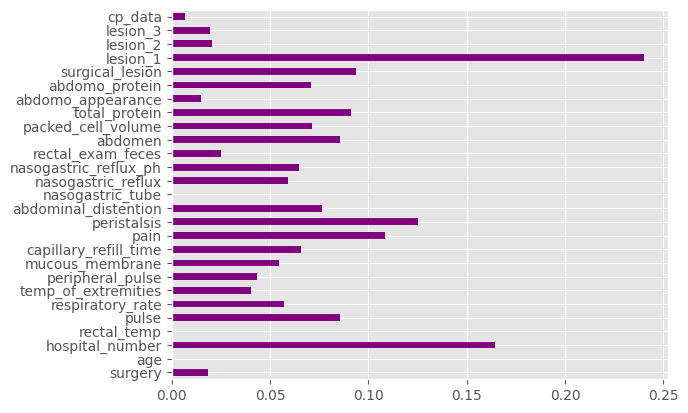

In [15]:
from sklearn.feature_selection import mutual_info_classif
plt.style.use("ggplot")
importance=mutual_info_classif(X,y)
feature_impo=pd.Series(importance,X.columns[0:len(X.columns)])
feature_impo.plot(kind="barh",color="purple")
plt.show()

In [16]:
X.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'surgical_lesion', 'lesion_1', 'lesion_2', 'lesion_3',
       'cp_data'],
      dtype='object')

In [17]:
X.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'surgical_lesion', 'lesion_1', 'lesion_2', 'lesion_3',
       'cp_data'],
      dtype='object')

In [18]:
X=df.drop(["rectal_temp"],axis=1)

In [19]:
X=df.drop(["peripheral_pulse"],axis=1)

In [20]:
X=df.drop(["abdomen"],axis=1)

In [21]:
X=df.drop(["nasogastric_tube"],axis=1)

In [22]:
X=df.drop(["nasogastric_reflux"],axis=1)

In [23]:
X=df.drop(["abdominal_distention"],axis=1)

In [24]:
X=df.drop(["lesion_3"],axis=1)
X

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,cp_data
0,0,0,530101,38.500000,66.0,28.0,1,3,3,2,...,0,45.0,8.400000,1,3.039604,0,0,11300,0,0
1,1,0,534817,39.200000,88.0,20.0,1,2,4,1,...,4,50.0,85.000000,1,2.000000,1,0,2208,0,0
2,0,0,530334,38.300000,40.0,24.0,2,2,5,1,...,3,33.0,6.700000,1,3.039604,2,0,0,0,1
3,1,1,5290409,39.100000,164.0,84.0,0,2,2,2,...,0,48.0,7.200000,2,5.300000,0,1,2208,0,1
4,0,0,530255,37.300000,104.0,35.0,1,2,2,2,...,0,74.0,7.400000,1,3.039604,0,0,4300,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1,0,533886,38.168619,120.0,70.0,0,2,4,2,...,0,55.0,65.000000,1,3.039604,1,0,3205,0,0
295,0,0,527702,37.200000,72.0,24.0,1,1,4,2,...,1,44.0,24.274436,2,3.300000,1,1,2208,0,1
296,1,0,529386,37.500000,72.0,30.0,0,3,4,1,...,0,60.0,6.800000,1,3.039604,0,1,3205,0,0
297,1,0,530612,36.500000,100.0,24.0,1,3,5,1,...,1,50.0,6.000000,2,3.400000,2,1,2208,0,1


<function matplotlib.pyplot.show(close=None, block=None)>

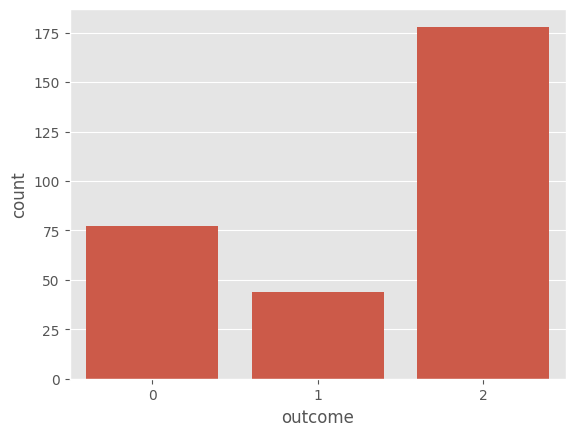

In [25]:
sns.countplot(x="outcome",data=df)
plt.show

In [26]:
from sklearn.utils import resample
df_0=df[df["outcome"]==0]
df_1=df[df["outcome"]==1]
df_2=df[df["outcome"]==2]
#seperate the original dataset into three  saperate DataFrame
# Base on the values i the "outcome" columns

df0_sam=resample(df_0,n_samples=2000)
df1_sam=resample(df_1,n_samples=2000)
df2_sam=resample(df_2,n_samples=2000)
# apply the resample function to each specific dataframe (df_0,df_1, df_2)
## this will create balance datset for classes 0,1,2 by up-sampling the dataframes
df=pd.concat([df0_sam,df1_sam,df2_sam])
df=df.sample(frac=1,ignore_index=True)
# shuffle the row of the concatnated dataframe (df). this is important to ensure that the order 0 samples don't bias
# the training process

<Axes: xlabel='outcome', ylabel='count'>

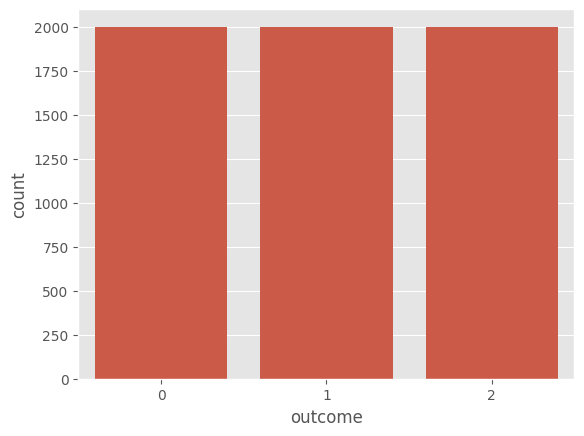

In [27]:
sns.countplot(x="outcome",data=df)

In [28]:
X=df.drop(["outcome"],axis=1)
y=df[["outcome"]]

In [29]:
xtrain,xtest,ytrain,ytest,=train_test_split(X,y, test_size=0.20,random_state=1)

In [30]:
from sklearn.pipeline import Pipeline
Pipelines={
      "KNeighbors":Pipeline([("Scaler",StandardScaler()), ("Classifer",KNeighborsClassifier())]),
      "DecisionTree":Pipeline([("CLASSIFIER",DecisionTreeClassifier())]),
      "LogisticRegression":Pipeline([("memory=Scaler",StandardScaler()),("CLASSIFIER",LogisticRegression())]),
      "RandomForest":Pipeline([("Scaler",StandardScaler()),("CLASSIFIER",RandomForestClassifier())]),
      "SVC":Pipeline([("Scaler",StandardScaler()),("CLASSIFIER",SVC())]),
      "GaussianNB":Pipeline([("Scaler",StandardScaler()),("CLASSIFIER",GaussianNB())]),
}

In [31]:
for name, pipeline in Pipelines.items():
    accuracy=pipeline.fit(xtrain,ytrain)
    print(F"{name} Fitted Successfully...")

c:\Users\hdwipe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\hdwipe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\hdwipe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


KNeighbors Fitted Successfully...
DecisionTree Fitted Successfully...
LogisticRegression Fitted Successfully...
RandomForest Fitted Successfully...


c:\Users\hdwipe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC Fitted Successfully...
GaussianNB Fitted Successfully...


c:\Users\hdwipe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
for name,pipeline in Pipelines.items():
    accuracy=pipeline.score(xtest,ytest)
    print(F"accuracy of {name}:{accuracy}")

accuracy of KNeighbors:1.0
accuracy of DecisionTree:1.0
accuracy of LogisticRegression:0.7075
accuracy of RandomForest:1.0
accuracy of SVC:0.9858333333333333
accuracy of GaussianNB:0.5066666666666667


EvaluatingKNeighbors on the testing data...


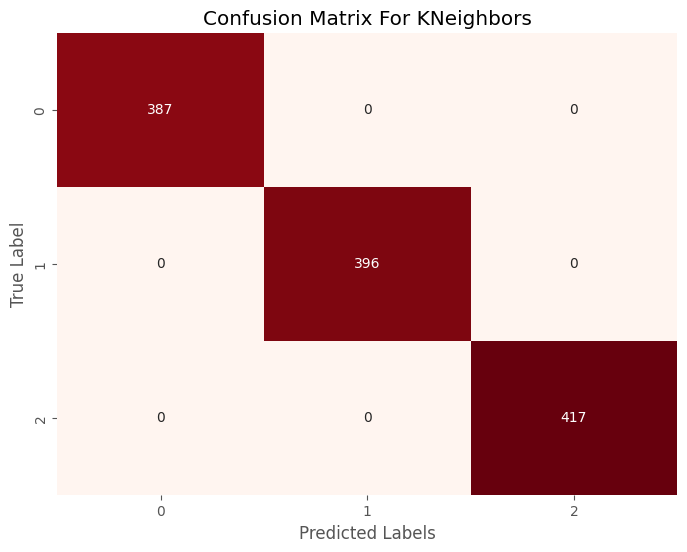

EvaluatingDecisionTree on the testing data...


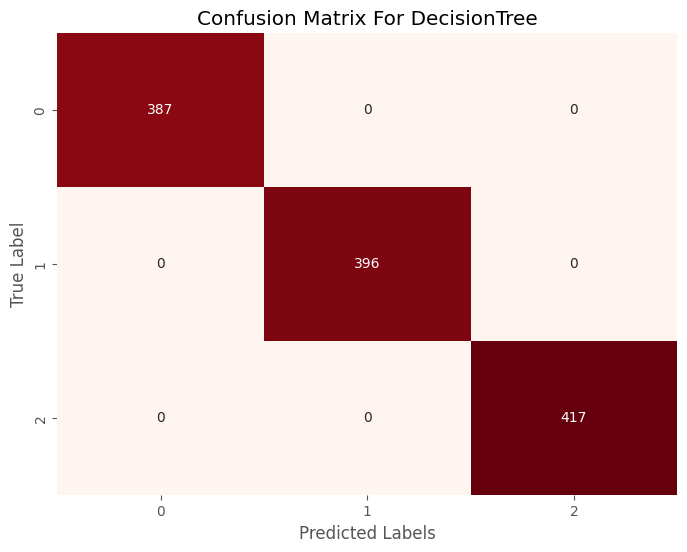

EvaluatingLogisticRegression on the testing data...


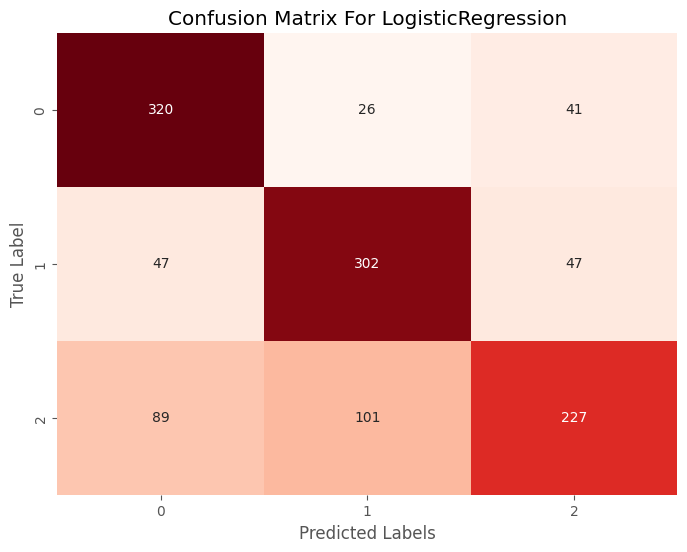

EvaluatingRandomForest on the testing data...


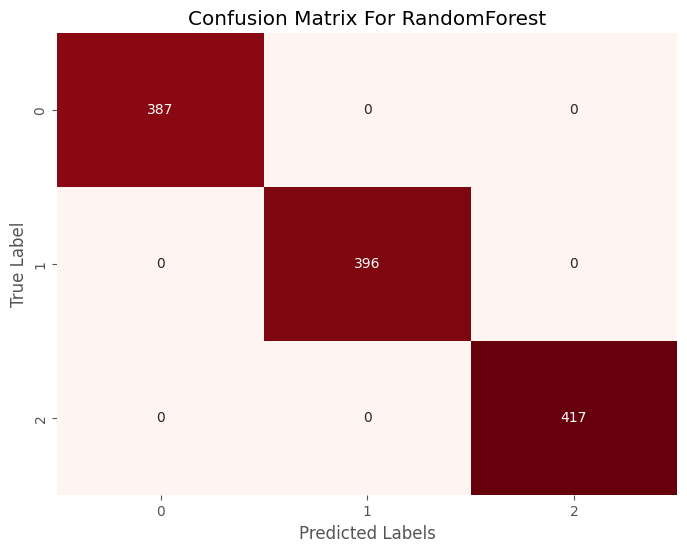

EvaluatingSVC on the testing data...


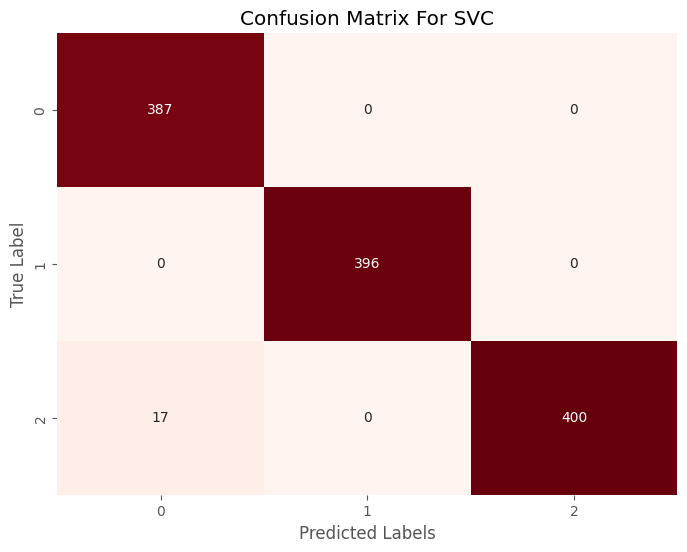

EvaluatingGaussianNB on the testing data...


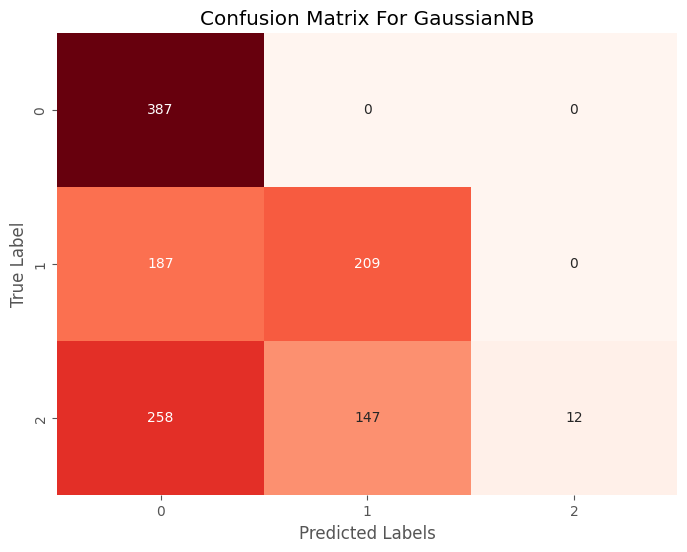

In [33]:
for name, pipeline in Pipelines.items():
    print(f"Evaluating{name} on the testing data...")
    # predict the label for the testing data
    y_pred=pipeline.predict(xtest)
    # Generate the confusion matrix
    cm=confusion_matrix(ytest,y_pred)
    # plot the Confussion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm,annot=True,fmt="d",cmap="Reds",cbar=False)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix For {name}")
    plt.show()